In [ ]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
x1=h5py.File('points2D_Set2.mat','r')
x_arr_1=x1.get('x')
x_arr_1=np.array(x_arr_1)
x_arr_2=x1.get('y')
x_arr_2=np.array(x_arr_2)
app=[]
for i in range(300):
   app.append([[x_arr_1[0][i]],[x_arr_2[0][i]]])
app=np.array(app,dtype='float32')

(1, 1000)


In [ ]:
#returns transpose of matrix
def trans(arr):
    x,y=np.shape(arr)
    xarr=np.zeros((y,x))
    for i in range(x):
      for j in range(y):
          xarr[j][i]=arr[i][j]
    return xarr
#returns covariance
def cov(arr):
  x_m=np.sum(app[:,0,0])/app.shape[0]
  y_m=np.sum(app[:,1,0])/app.shape[0]
  mean=[[x_m],[y_m]]
  x=arr.shape[0]
  mat=np.zeros((arr.shape[1],arr.shape[1]))
  for i in arr:
    mat=mat+np.matmul(i-mean,trans(i-mean))
  return mat/x
#returns priciple component first one !
def principle_comp(C):
  W,V=np.linalg.eig(C)
  vect=V[:,np.argmax(W)]
  return vect
#will generate one array if outputs for each input
def get_y(x,vect):
  x_m=np.sum(app[:,0,0])/app.shape[0]
  y_m=np.sum(app[:,1,0])/app.shape[0]
  arr=[]
  for i in x:
      arr.append((vect[1]/vect[0])*(i-x_m)+y_m)
  return np.array(arr)


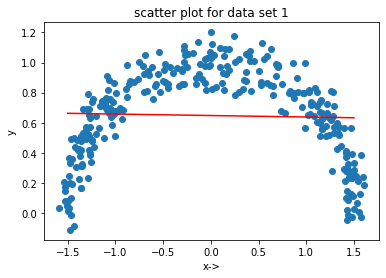

In [ ]:
vect=principle_comp(cov(app))
plt.xlabel('x->')
plt.ylabel('y')
plt.title('scatter plot for data set 1')
plt.scatter(app[:,0,0],app[:,1,0])
plt.plot([-1.5,1.5],get_y([-1.5,1.5],vect),'r-')
plt.show()
